# Exercices sur les DT et les érosions

Goal :
- explain link btw the dt distance transform and mathematical morphology
- write a  fct dt4 that computes the dt for d4
- write a fct erode11 that erodes an image with the square SE side 11

- use .py file
- if \_\_name\_\_ == "\_\_main\_\_" : ...

##### Answer :
- morpho math : opération entre un objet (ensemble de pixels, une image) et un élément structurant
- transformée de distance : opération sur une image binaire (un objet + un fond) 

### Fonctions

In [1]:
def dt4(image) :
    """Algo wavefront pour la DT avec d4"""
    dt = []
    for i in range(len(image)):
        dt.append([float('inf')] * len(image[0]))

    to_visit = []
    head = 0 # pour la file
    
    # Background :

    # On prend tous les pixels de fond, et on les met dans la liste pour pouvoir visiter leurs voisins
    for i in range(len(image)):
        for j in range(len(image[0])):
            if image[i][j] == 0:
                dt[i][j] = 0
                to_visit.append((i, j))

    while head < len(to_visit):
        i, j = to_visit[head]
        head += 1
        # On visite les 4-voisins, on met leur dt à +1 puis on les ajoute à la liste aussi
        for x, y in [(-1,0),(1,0),(0,-1),(0,1)]: # voisins haut, bas, gauche, droite
            if 0 <= i+x < len(image) and 0 <= j+y < len(image[0]):
                if dt[i+x][j+y] > dt[i][j] + 1:
                    dt[i+x][j+y] = dt[i][j] + 1
                    to_visit.append((i+x, j+y))
    return dt

In [2]:
def erode11(image, SE=11) :
    """Erode l'image avec un SE carré de côté 11
    -> parcourir l'image et si le DT est inférieur au rayon du carré, alors le pixel sera eroded"""
    ero = []
    for _ in range(len(image)):
        ero.append([0]*len(image[0]))
    
    r = SE//2 # rayon du carré (arrondi)
    image_dt = dt4(image)
    for i in range(len(image)):
        for j in range(len(image[0])):
            ero[i][j] = 0 if image_dt[i][j] < r else 1
    
    return ero

### Vérifications

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# affichage des images

def show_image(mat, binary=True):
    plt.imshow(mat, cmap=ListedColormap(['white', 'black']) if binary else 'inferno')
    plt.xticks(range(len(mat[0])))
    plt.yticks(range(len(mat)))
    plt.gca().set_xticks([i + 0.5 for i in range(len(mat[0]))], minor=True)
    plt.gca().set_yticks([i + 0.5 for i in range(len(mat))], minor=True)
    plt.grid(True, which="minor", color="gray", linestyle='--', linewidth=0.5)
    if not binary :
        for i in range(len(mat)):
            for j in range(len(mat[0])):
                plt.text(j, i, str(mat[i][j]), ha='center', va='center', color='black')
    plt.show()

In [4]:
matrice = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
           [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
           [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

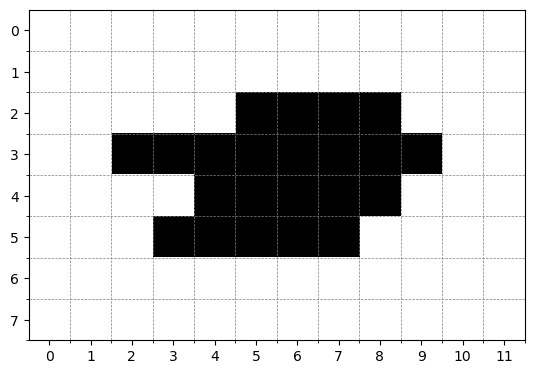

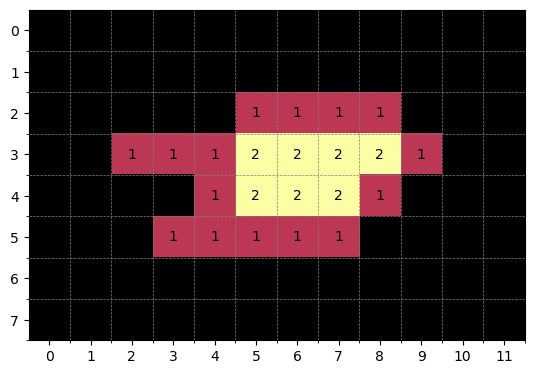

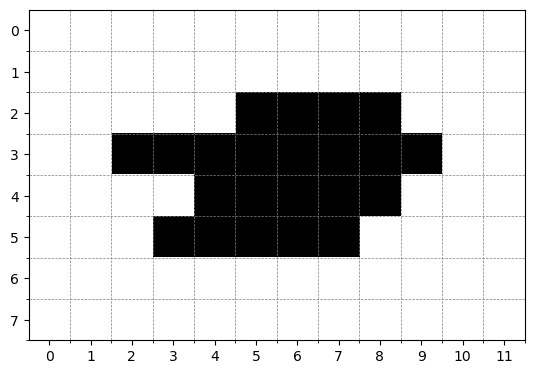

In [5]:
show_image(matrice)
show_image(dt4(matrice), binary=False)
show_image(erode11(matrice, 3))

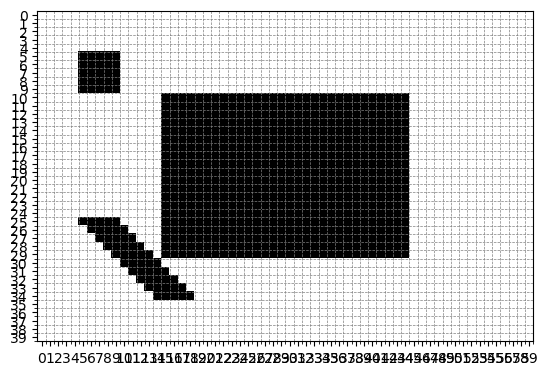

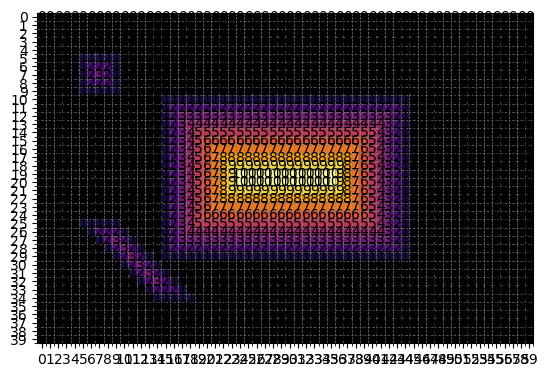

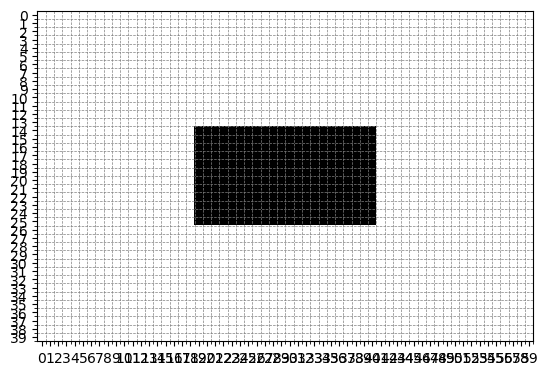

In [6]:
def test_matrix(height=40, width=60):
    mat = [[0]*width for _ in range(height)]
    
    # un rectangle au centre
    for i in range(10, 30):
        for j in range(15, 45):
            mat[i][j] = 1
    
    # un petit carré isolé
    for i in range(5, 10):
        for j in range(5, 10):
            mat[i][j] = 1

    # une forme diagonale
    for i in range(25, 35):
        for j in range(i-20, i-15):
            mat[i][j] = 1
            
    return mat
matrice2 = test_matrix()
show_image(matrice2)
show_image(dt4(matrice2), binary=False)
show_image(erode11(matrice2))